# Adversarial Variational Optimization: Weinberg benchmark

In [1]:
import cag
import torch
import matplotlib.pyplot as plt

/home/joeri/Anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


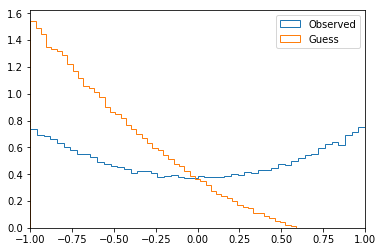

In [2]:
from cag.benchmark.weinberg import allocate_observations

# Allocate the true observations.
true_beam = 45.
true_fermi_constant = .95
theta = torch.tensor([true_beam, true_fermi_constant])
theta_true, x_o = allocate_observations(theta)
# Allocate some random guess.
guess_beam = 41.
guess_fermi_constant = 1.6
theta = torch.tensor([guess_beam, guess_fermi_constant])
_, x_guess = allocate_observations(theta)

# Show the observations.
plt.hist(x_o.numpy(), bins=50, normed=True, histtype='step', stacked=True, fill=False, lw=1, label="Observed")
plt.hist(x_guess.numpy(), bins=50, normed=True, histtype='step', stacked=True, fill=False, lw=1, label="Guess")
plt.xlim([-1, 1])
plt.legend()
plt.show()

## AVO

### Discriminator

In [3]:
num_hidden = 200
discriminator = torch.nn.Sequential(
    torch.nn.Linear(1, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, num_hidden),
    torch.nn.PReLU(),
    torch.nn.Linear(num_hidden, 1),
    torch.nn.Sigmoid()
)

### Simulator

In [4]:
from cag.benchmark.weinberg import WeinbergSimulator as Simulator

simulator = Simulator()

### Proposal

In [5]:
from cag.proposal import MultivariateNormalProposal

mu = torch.tensor([45., 1.])
sigma = torch.eye(2)
proposal = MultivariateNormalProposal(mu, sigma)

### Inference

In [6]:
from cag.method import AdversarialVariationalOptimization

avo = AdversarialVariationalOptimization(simulator, discriminator, proposal)

In [7]:
proposal = avo.infer(x_o, num_steps=5000)

[tensor([-4.8637e-05,  4.2319e-06]), tensor([[-0.0000,  0.7098],
        [ 0.0000,  0.0000]])]


ValueError: only one element tensors can be converted to Python scalars